# TOPIC - ELECTIONS

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Initialize a Reddit instance with client ID, client secret, and user agent
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="1570Wyx2TI9-s-Vszy-Uzg",
    client_secret="pZA51fDeCSXhNRFmE929_27PZRrrtQ",
    user_agent=user_agent
)

In [6]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

**TRENDING TOPIC IS 'ELECTIONS':**

In [8]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("elections").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

USA: 2022 Pennsylvania Elections: Donald Trump Is Still The "KING" To Many People, Including Some Who Believe The Falsehood That Trump Won The 2020 Election, But Will It Help The Republican Party?
xtq5d5
Motor-Ad-8858
1664720808.0
6
0.88
https://apnews.com/article/2022-midterm-elections-steve-bannon-donald-trump-campaigns-presidential-3542ec650fd275d80cd97f12e648e904
0


In [13]:
# Iterate through hot submissions in the "elections" subreddit and add their titles to the set
headlines = set()
for submission in reddit.subreddit("elections").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

823


**CREATING DATAFRAME:**

In [14]:
#Create a dataframe from the scrapped data 
elections_df = pd.DataFrame(headlines)
elections_df.head()

,0
0,Exit polls: Netanyahu short of majority in yet...
1,"Pushing racial boundaries, Trump draws rebuke ..."
2,USA: The 2022 Primary Elections Will Be Held I...
3,2022 Georgia Elections: America's Ban On Food ...
4,President Trump promises the next Great Depres...


**EXTRTACTING COLUMNS:**

In [38]:
#extracting the columns from dataframe
df = elections_df.iloc[:, 1:]
elections_df.head()

,Titles,Subjectivity,Polarity,Insight
0,Exit polls Netanyahu short of majority in yet ...,0.300,0.0,Neutral
1,"Pushing racial boundaries, Trump draws rebuke ...",0.000,0.0,Neutral
2,USA The 2022 Primary Elections Will Be Held In...,0.500,0.4,Positive
3,2022 Georgia Elections America's Ban On Food &...,0.000,0.0,Neutral
4,President Trump promises the next Great Depres...,0.375,0.4,Positive


In [37]:
# Retrieve the column labels (column names) of the DataFrame
elections_df.columns

Index(['Titles', 'Subjectivity', 'Polarity', 'Insight'], dtype='object')

In [19]:
# Rename the columns of the DataFrame to 'Titles'
elections_df.columns = ['Titles']

In [20]:
# Display the first few rows of the DataFrame
elections_df.head()

,Titles
0,Exit polls: Netanyahu short of majority in yet...
1,"Pushing racial boundaries, Trump draws rebuke ..."
2,USA: The 2022 Primary Elections Will Be Held I...
3,2022 Georgia Elections: America's Ban On Food ...
4,President Trump promises the next Great Depres...


**COUNTING DUPLICATE TITLES:**

In [21]:
# Count the number of duplicated titles in the 'Titles' column
elections_df.Titles.duplicated().sum()

0

**CLEANING THE TEXT:**

In [22]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
elections_df["Titles"]= elections_df["Titles"].apply(cleanTxt)

#Show the clean text
elections_df.head()


,Titles
0,Exit polls Netanyahu short of majority in yet ...
1,"Pushing racial boundaries, Trump draws rebuke ..."
2,USA The 2022 Primary Elections Will Be Held In...
3,2022 Georgia Elections America's Ban On Food &...
4,President Trump promises the next Great Depres...


In [23]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
elections_df["Titles"]= elections_df["Titles"].apply(remove_emoji)

#Show the clean text
elections_df.head()

,Titles
0,Exit polls Netanyahu short of majority in yet ...
1,"Pushing racial boundaries, Trump draws rebuke ..."
2,USA The 2022 Primary Elections Will Be Held In...
3,2022 Georgia Elections America's Ban On Food &...
4,President Trump promises the next Great Depres...


In [25]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.3 MB/s eta 0:00:00a 0:00:01


In [26]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [27]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
elections_df['Subjectivity'] = elections_df['Titles'].apply(getSubjectivity)
elections_df['Polarity'] = elections_df['Titles'].apply(getPolarity)

#Now display data
elections_df.head()


,Titles,Subjectivity,Polarity
0,Exit polls Netanyahu short of majority in yet ...,0.300,0.0
1,"Pushing racial boundaries, Trump draws rebuke ...",0.000,0.0
2,USA The 2022 Primary Elections Will Be Held In...,0.500,0.4
3,2022 Georgia Elections America's Ban On Food &...,0.000,0.0
4,President Trump promises the next Great Depres...,0.375,0.4


In [29]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
elections_df["Insight"] = elections_df["Polarity"].apply(getInsight)

elections_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Exit polls Netanyahu short of majority in yet ...,0.300000,0.000000,Neutral
1,"Pushing racial boundaries, Trump draws rebuke ...",0.000000,0.000000,Neutral
2,USA The 2022 Primary Elections Will Be Held In...,0.500000,0.400000,Positive
3,2022 Georgia Elections America's Ban On Food &...,0.000000,0.000000,Neutral
4,President Trump promises the next Great Depres...,0.375000,0.400000,Positive
5,Ted Cruz Steals the Spotlight from Mike Pence ...,0.000000,0.000000,Neutral
6,"Despite Trump’s assurances, states struggling ...",0.000000,0.000000,Neutral
7,President Assad Postpones Parliament Elections...,0.000000,0.000000,Neutral
8,Clinton's economic speech CNN's Reality Check ...,0.200000,0.200000,Positive
9,Poll Majority of Americans Dislike Hillary Cli...,0.000000,0.000000,Neutral


**DATA VISUALIZATION:**

In [30]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

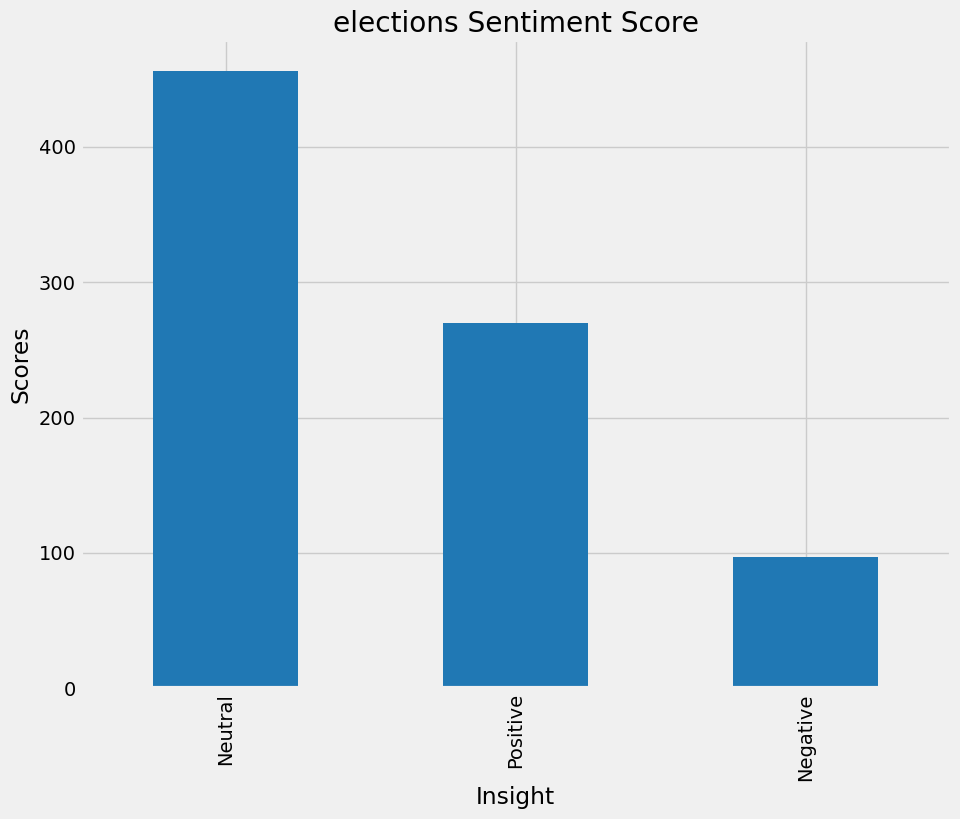

In [34]:
#Plot the values count of sentiment
plt.title("elections Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (8,8)
elections_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

**WordCloud:**

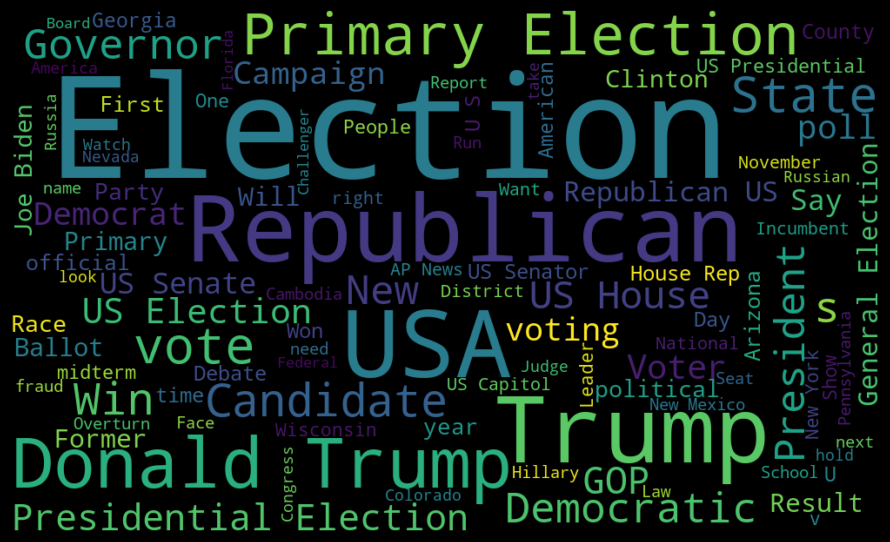

In [36]:
text = ' '.join( [twts for twts in elections_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
